In [1]:
#Dependencies.

import tweepy
import json
import pandas as pd
import numpy as np
import time
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
 # Import and Initialize Sentiment Analyzer.
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [4]:
# Twitter API Keys
consumer_key = "gHTIFF72F1rAYIqRTc0bUlgek"
consumer_secret = "qOvbqy8AaUdIthyYPztc0FPEflT9fHLVDaNDPpqeS323GykD85"
access_token = "42514923-9blS4jGeI7evKdfRteHlZiM9ZJfmEvr8HVFaUXoeJ"
access_token_secret = "wUL5KVvXlqPTSVKl5JAzKd5ZtLobzZZGO7HlgBvsHS4CF"

In [5]:
# Setup Tweepy API Authentication.

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [30]:

#set up the loop for each tweet
sentiments = []

target_users = ("@BBC", "@CBS", "@CNN", "@FoxNews", "@NYTimes")

#Loop though target users.

for user in target_users:
    
    #Counter 

    counter = 0
    
        #Get all tweets from the homefeed of each news organization.

    public_tweets = api.user_timeline(user, count = 100)

        #Loop through all tweets.

    for tweet in public_tweets:

        #Run the Vader analysis on each tweet.

        compound = analyzer.polarity_scores(tweet["text"])["compound"]
        pos = analyzer.polarity_scores(tweet["text"])["pos"]
        neu = analyzer.polarity_scores(tweet["text"])["neu"]
        neg = analyzer.polarity_scores(tweet["text"])["neg"]
        tweets_ago = counter
        tweet_text = tweet["text"]

        #Add sentiments for each tweet to the sentiments list.

        sentiments.append({"User" : user,
                           "Date": tweet["created_at"],
                           "Compound" : compound,
                           "Positive" : pos,
                           "Negative" : neg,
                           "Neutral" : neu,
                           "Tweets Ago" : counter,
                           "Tweet Text" : tweet_text})
        #Add to counter.

        counter = counter + 1

In [31]:
news_sentiments = pd.DataFrame.from_dict(sentiments)
news_sentiments

,Compound,Date,Negative,Neutral,Positive,Tweet Text,Tweets Ago,User
0,0.5574,Sun Aug 19 19:01:04 +0000 2018,0.000,0.796,0.204,🚗🚙🚗🚙 Four celebrity duos join a group of class...,0,@BBC
1,0.0000,Sun Aug 19 16:56:00 +0000 2018,0.000,1.000,0.000,Could these sketches be early works from one o...,1,@BBC
2,0.5984,Sun Aug 19 16:05:00 +0000 2018,0.000,0.671,0.329,😍 The geometric patterns created by Jupiter's ...,2,@BBC
3,0.0000,Sun Aug 19 15:03:05 +0000 2018,0.000,1.000,0.000,❤️☺️ These new born flamingo chicks are learni...,3,@BBC
4,0.4404,Sun Aug 19 14:10:05 +0000 2018,0.000,0.707,0.293,Nine secrets to improve your relationships.\n👉...,4,@BBC
5,-0.2023,Sun Aug 19 13:12:07 +0000 2018,0.121,0.805,0.075,🌎 Want to cut down on the plastic your family ...,5,@BBC
6,0.0516,Sun Aug 19 11:03:06 +0000 2018,0.136,0.678,0.186,Vaping can damage vital immune system cells an...,6,@BBC
7,0.5859,Sun Aug 19 10:06:04 +0000 2018,0.000,0.441,0.559,🙌 This is brilliant. https://t.co/HwCIxhosAL,7,@BBC
8,-0.7096,Sun Aug 19 09:02:05 +0000 2018,0.237,0.763,0.000,US Police have made an arrest in a fatal hit-a...,8,@BBC
9,0.6908,Sun Aug 19 08:08:05 +0000 2018,0.000,0.659,0.341,A whale has been rescued from a fishing net th...,9,@BBC


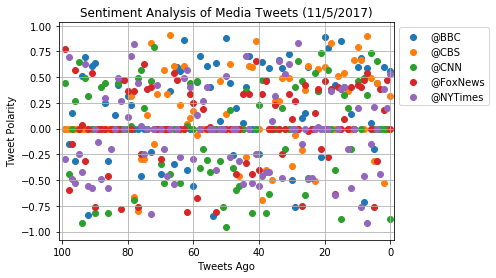

In [21]:
# Set the x limit,
plt.xlim(101, -1)

#plot scatterplot using a for loop.
for user in target_users:
    dataframe = news_sentiments.loc[news_sentiments["User"] == user]
    plt.scatter(dataframe["Tweets Ago"],dataframe["Compound"],label = user)
    
    #Add legend
plt.legend(bbox_to_anchor = (1,1))

#Add title, x axis label, and y axis label.
plt.title("Sentiment Analysis of Media Tweets (11/5/2017)")
plt.xlabel("Tweets Ago")
plt.ylabel("Tweet Polarity")

#Set a grid on the plot.
plt.grid()

plt.savefig("Sentiment Analysis of Media Tweets")
plt.show()

In [22]:
average_sentiment = news_sentiments.groupby("User")["Compound"].mean()
average_sentiment

User
@BBC        0.169905
@CBS        0.125383
@CNN       -0.010787
@FoxNews    0.034773
@NYTimes   -0.031482
Name: Compound, dtype: float64

In [24]:
newsdf = pd.DataFrame(average_sentiment)
newsdf

,Compound
User,
@BBC,0.169905
@CBS,0.125383
@CNN,-0.010787
@FoxNews,0.034773
@NYTimes,-0.031482


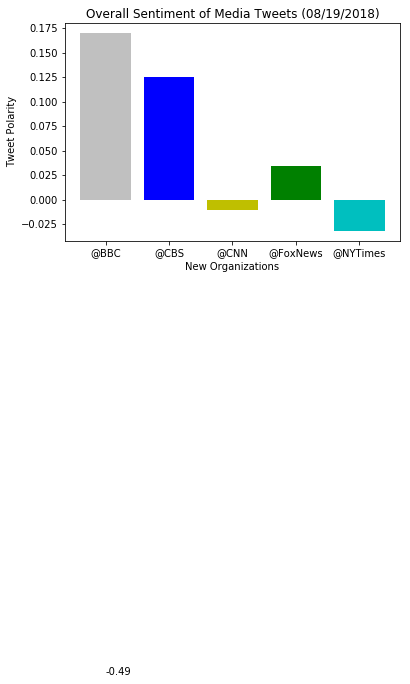

In [33]:
x_axis = np.arange(len(average_sentiment))
xlabels = average_sentiment.index
count = 0
for sentiment in newsdf:
    plt.text(count, compound+.01, str(round(compound,2)))
    count = count + 1
plt.bar(x_axis, average_sentiment, tick_label = xlabels, color = ['silver', 'b', 'y', 'g', 'c'])
#Set title, x axis label, and y axis label.
plt.title("Overall Sentiment of Media Tweets (08/19/2018)")
plt.xlabel("New Organizations")
plt.ylabel("Tweet Polarity")
plt.savefig("Overall Sentiment of Media Tweets")
plt.show()

1) CNN & NYTimes have a negative vader analysis. @CNN at -0.010 and @NYTimes at -0.031
2) While BBC and CBS lead the way with a poassitive vader analysis @BBC 0.169 and @CBS at 0.125 
3) I could imagine that the racking are changing every time we rerun the vader analysis and it also depends on the type of news each organization breaks. 